In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]

9

In [11]:
def load_img(i):
  plt.figure(figsize=(1,1))
  plt.imshow(X_train[i])
  print(y_train[i])
  print("________________")
  plt.show()

9
________________


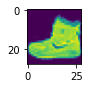

0
________________


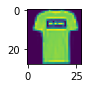

0
________________


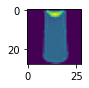

3
________________


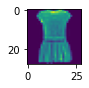

0
________________


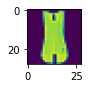

2
________________


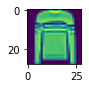

7
________________


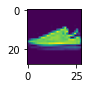

2
________________


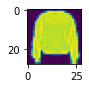

5
________________


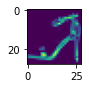

5
________________


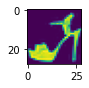

In [12]:
for i in range(10):
  load_img(i)

In [13]:
# Creating a list to store the lables
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

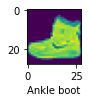

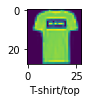

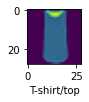

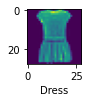

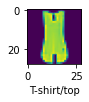

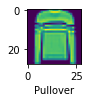

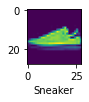

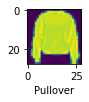

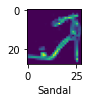

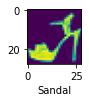

In [15]:

for i in range(10):
  plt.figure(figsize=(1,1))
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i]])
  plt.show()

In [16]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [17]:
# List of all Physical Devices which are open to use
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [21]:
# Scaling the values [0,1] range
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [22]:
X_train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [23]:
# PREPROCESSING THE SCALED IMAGES
# Performing one hot encoding
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [24]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [25]:
y_train_categorical[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [27]:
# MODEL BUILDING
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


In [28]:
from tensorflow.python import metrics
# MODEL COMPILATION
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_scaled,y_train_categorical,epochs=40)

Epoch 1/40
1875/1875 [==============================] - 7s 2ms/step - loss: 0.6676 - accuracy: 0.7831
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4650 - accuracy: 0.8380
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4214 - accuracy: 0.8530
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3954 - accuracy: 0.8620
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3758 - accuracy: 0.8673
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3603 - accuracy: 0.8724
Epoch 7/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3460 - accuracy: 0.8774
Epoch 8/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3338 - accuracy: 0.8813
Epoch 9/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3242 - accuracy: 0.8849
Epoch 10/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.314

In [29]:
model.predict(X_test_scaled)[6]

313/313 [==============================] - 1s 1ms/step


array([1.8230663e-01, 2.7101532e-01, 9.4611484e-01, 5.4363626e-01,
       9.9999499e-01, 5.5651352e-02, 9.9404931e-01, 2.0919641e-04,
       3.2488784e-01, 4.3510180e-04], dtype=float32)

In [30]:
np.argmax(model.predict(X_test_scaled)[6])

313/313 [==============================] - 1s 2ms/step


4

In [31]:
y_test_categorical[6]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
y_test[6]

4

In [43]:
for i in range(20):
  res = np.argmax(model.predict(X_test_scaled)[i])
  print(res)
  print(y_test[i])
  print(class_names[res])
  print('----------')


313/313 [==============================] - 0s 1ms/step
9
9
Ankle boot
----------
313/313 [==============================] - 0s 1ms/step
2
2
Pullover
----------
313/313 [==============================] - 0s 1ms/step
1
1
Trouser
----------
313/313 [==============================] - 0s 1ms/step
1
1
Trouser
----------
313/313 [==============================] - 0s 1ms/step
0
6
T-shirt/top
----------
313/313 [==============================] - 0s 1ms/step
1
1
Trouser
----------
313/313 [==============================] - 0s 1ms/step
4
4
Coat
----------
313/313 [==============================] - 0s 2ms/step
6
6
Shirt
----------
313/313 [==============================] - 0s 1ms/step
5
5
Sandal
----------
313/313 [==============================] - 0s 1ms/step
7
7
Sneaker
----------
313/313 [==============================] - 0s 1ms/step
4
4
Coat
----------
313/313 [==============================] - 0s 1ms/step
5
5
Sandal
----------
313/313 [==============================] - 0s 1ms/step
5
7
Sandal


In [42]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 0.3250 - accuracy: 0.8867


[0.32501929998397827, 0.8866999745368958]

In [44]:
# FUNCTION
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [47]:
# MEASURING FROM CPU
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.6661 - accuracy: 0.7824
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4641 - accuracy: 0.8406
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4199 - accuracy: 0.8541
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3937 - accuracy: 0.8624
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3750 - accuracy: 0.8687
1min 32s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [48]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6647 - accuracy: 0.7826
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4663 - accuracy: 0.8387
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4221 - accuracy: 0.8533
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3954 - accuracy: 0.8609
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3749 - accuracy: 0.8682
41.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
